# Keras with MNIST data

Что собой представляет набор данных MNIST:

- 60000 рукописных цифр

- 2 файла: 
    1. файл с изображениями
    2. файл с метками класса (правильные ответы)
  
- Изображение размера 28х28 пикселей в оттенках серого цвета и хранятся в бинарном файле

### Архитектура нашей нейронной сети:

Входные значения сети:

1. Интенсивность пикселя в изображении

2. Количество значений - 784 (28х28 пикселя)

Входной слой:

1. 800 нейронов (на вход каждому нейрону поступают все значения о 784 пикселях изображения). Данная архитектура использовалась в одной из научных статей и хорошо показала себя в работе, можно эксперементировать и менять количество нейронов на входном слою.

2. Статья: "Best Practices for Convolutional Neural Networks Applied to Visual Document Analysis" Patrice Y. Simard, Dave Steinkraus, John C. Platt 

Выходной слой:

1. 10 нейронов - каждый нейрон соответствует одному из классов рукописных цифр от 0 до 9.

2. На выходе нейрона вероятность того, что на данном изображении именно эта цифра.

**!pip install ....-в Jupyter установка**

## Импортируем необходимые библиотеки

In [12]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
# Устанавливаем seed для повторяемости результатов
numpy.random.seed(42)

In [14]:
# Загружаем данные
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 30s 3us/step


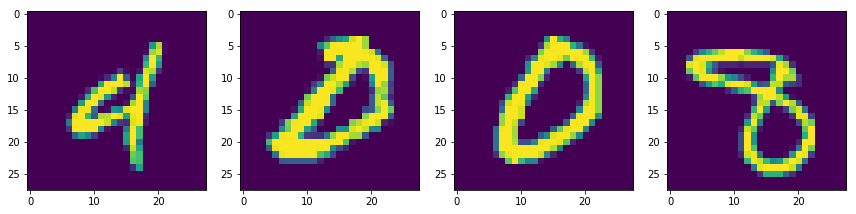

In [15]:
num_show = 4

plt.figure(figsize=(12,8))
for i in range(num_show):
    index = np.random.randint(0, X_train.shape[0], 1)[0]
    plt.subplot(241 + i)
    plt.imshow(X_train[index])
    
plt.tight_layout()
plt.show()

In [16]:
# Преобразование размерности изображений
X_train = X_train.reshape(60000, 784)  # 60000 изображений по 784 (28х28) пикселей
X_test = X_test.reshape(10000, 784)  # 10000 изображений по 784 (28х28) пикселей

In [17]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [18]:
# Нормализация данных
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [19]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
y_train[0]

5

In [21]:
# Преобразуем метки в категории
# 0 класс будет преобразован в массив вида [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
# 1 - [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] и т.д.

Y_train = np_utils.to_categorical(y_train, 10)  # 0 класс будет преобразован в массив вида [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
Y_test = np_utils.to_categorical(y_test, 10)

In [22]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [23]:
# Создаем последовательную модель
model = Sequential()

- Dense - соединение всех нейронов уровня со всеми нейронами следующего уровня

- units - количество нейронов слоя

- input_dim - количество входящих значений в каждый нейрон

- activation - функция активации

- kernel_initializer - веса задаются слуйчайным образом с помощью нормального распределения 

In [24]:
# Добавляем уровни сети
model.add(Dense(units=800, input_dim=784, activation="relu", kernel_initializer="normal"))
model.add(Dense(units=10, activation="softmax", kernel_initializer="normal"))

- loss - мера ошибки

- optimizer - метод обучения

- metrics -  метрика, по которой выполняется оптимизация

In [25]:
# Компилируем модель
model.compile(loss="categorical_crossentropy", optimizer="ADAM", metrics=["accuracy"])

In [26]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
# Обучаем сеть
history = model.fit(X_train, Y_train, batch_size=400, epochs=10, validation_split=0.2, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.3916 - acc: 0.8880 - val_loss: 0.1927 - val_acc: 0.9480
Epoch 2/10
 - 3s - loss: 0.1648 - acc: 0.9525 - val_loss: 0.1401 - val_acc: 0.9610
Epoch 3/10
 - 3s - loss: 0.1121 - acc: 0.9680 - val_loss: 0.1108 - val_acc: 0.9681
Epoch 4/10
 - 3s - loss: 0.0816 - acc: 0.9776 - val_loss: 0.1011 - val_acc: 0.9687
Epoch 5/10
 - 3s - loss: 0.0630 - acc: 0.9827 - val_loss: 0.0922 - val_acc: 0.9739
Epoch 6/10
 - 3s - loss: 0.0490 - acc: 0.9871 - val_loss: 0.0811 - val_acc: 0.9748
Epoch 7/10
 - 3s - loss: 0.0381 - acc: 0.9906 - val_loss: 0.0786 - val_acc: 0.9758
Epoch 8/10
 - 3s - loss: 0.0307 - acc: 0.9927 - val_loss: 0.0791 - val_acc: 0.9759
Epoch 9/10
 - 4s - loss: 0.0238 - acc: 0.9948 - val_loss: 0.0707 - val_acc: 0.9788
Epoch 10/10
 - 4s - loss: 0.0184 - acc: 0.9968 - val_loss: 0.0705 - val_acc: 0.9803


In [28]:
# Оцениваем качество обучения сети на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 97.98%


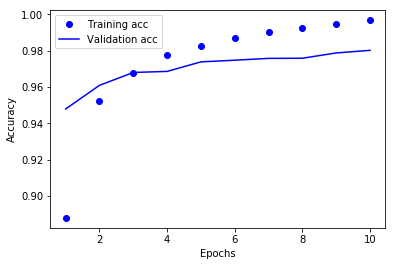

In [29]:
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Можно попытаться улучшить качество обучения сети путем изменения гиперпараметров: количество эпох обучения, размер мини-выборки, количество нейронов во входном слое, количество скрытых слоев. Для этого нужно провести серию экспериментов, в каждом из которых необходимо менять один из гиперпараметров, и анализировать, как изменилось качество работы сети.

**Источники:**

https://www.asozykin.ru/courses/nnpython-lab1


Т.к. глубокие нейронные сети требуют достоточно большого времени на обучение модели (от нескольких часов), мы не будем рассматривать их в практике. Предлагаю самостоятельно посмотреть данный урок и попробовать обучить сеть для распознавания изображения на картинке: 
https://www.asozykin.ru/courses/nnpython-lab2 - Распознавание объектов на изображениях с помощью Keras (Сверточные Нейронные Сети)